## SDRのデータ形式

### ドキュメント

In [1]:
!python3 -m pydoc htm.bindings.sdr.SDR

Help on class SDR in htm.bindings.sdr:

hhttmm..bbiinnddiinnggss..ssddrr..SSDDRR = class SDR(pybind11_builtins.pybind11_object)
 |  Sparse Distributed Representation
 |  
 |  This class manages the specification and momentary value of a Sparse Distributed
 |  Representation (SDR).  An SDR is a group of boolean values which represent the
 |  state of a group of neurons or their associated processes.
 |  
 |  SDR's have three commonly used data formats which are:
 |  *   dense
 |  *   sparse
 |  *   coordinates
 |  The SDR class has three magic properties, one for each of these data formats.
 |  These properties are the primary way of accessing the SDR's data.  When these
 |  properties are read from, the data is automatically converted to the requested
 |  format and is cached so getting a value in one format many times incurs no extra
 |  performance cost.  Assigning to the SDR via any one of these properties clears
 |  the cached values and causes them to be recomp

### サンプルコード

In [2]:
from htm.bindings.sdr import SDR
import numpy as np # SDRはすべてのnumpy配列を使用します

In [3]:
# 9つの値を持つSDRを作成し、(3 x 3)グリッドに配置する
X = SDR(dimensions = (3, 3))
print(X)

SDR( 3, 3 )


In [4]:
# この3つの記述は等価です
X.dense  = np.array([[0, 1, 0], [0, 1, 0], [0, 0, 1]])
X.sparse = np.array([ 1, 4, 8 ])
X.coordinates = np.array([[0, 1, 2], [1, 1, 2]])

print(X.dense)
print("")
print(X.sparse)
print("")
print(X.coordinates)

[[0 1 0]
 [0 1 0]
 [0 0 1]]

[1 4 8]

[array([0, 1, 2], dtype=uint32), array([1, 1, 2], dtype=uint32)]


### サンプルの可視化

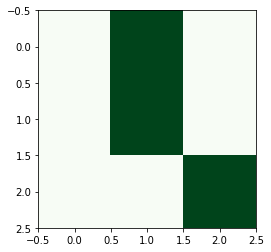

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X.dense, cmap = "Greens")
plt.show()

In [6]:
# 任意の形式でデータにアクセスした場合、SDRは自動的にデータ形式を変換します。
X.dense ==  np.array([[0, 1, 0], [0, 1, 0], [0, 0, 1]])
X.sparse == np.array([ 1, 4, 8 ])
X.coordinates == np.array( [[0, 1, 2], [1, 1, 2]])

print(X.dense)
print("")
print(X.sparse)
print("")
print(X.coordinates)

[[0 1 0]
 [0 1 0]
 [0 0 1]]

[1 4 8]

[array([0, 1, 2], dtype=uint32), array([1, 1, 2], dtype=uint32)]


In [7]:
# データフォーマット変換はキャッシュされ, SDRの値が変更されるとキャッシュはクリアされます.
X.sparse = [1, 2, 3] # 新しいデータをSDRに割り当て、キャッシュをクリアする。
X.dense     # この行はフォーマットを変換します
X.dense     # この行は前の行の結果を再利用します.

print(X.sparse)
print("")
print(X.dense)
print("")
print(X.dense)

[1 2 3]

[[0 1 1]
 [1 0 0]
 [0 0 0]]

[[0 1 1]
 [1 0 0]
 [0 0 0]]


In [8]:
import numpy as np
from htm.bindings.sdr import SDR

sample=np.array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])
print(sample)

[0 0 0 1 0 1 0 1 1 0 0 0 0 0 0]


In [9]:
print(sample.shape)

(15,)


In [10]:
inputSDR = SDR( sample.shape )
print(inputSDR)

SDR( 15 )


In [11]:
inputSDR.dense=sample
print(inputSDR.dense)
print(inputSDR.dense.shape[0])

[0 0 0 1 0 1 0 1 1 0 0 0 0 0 0]
15


In [13]:
print(inputSDR)

SDR( 15 ) 3, 5, 7, 8


[[0 0 0 1 0 1 0 1 1 0 0 0 0 0 0]]


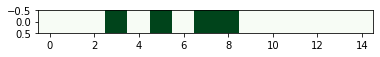

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
sampleSDR=np.reshape(inputSDR.dense,(1,inputSDR.dense.shape[0]))
print(sampleSDR)

plt.imshow(sampleSDR, cmap = "Greens")
plt.show()

[[0 0 0 1 0 1 0 1 1 0 0 0 0 0 0]]


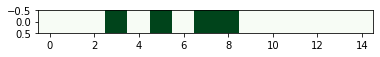

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
sampleSDR=inputSDR.dense.reshape(1,inputSDR.dense.shape[0])
print(sampleSDR)

plt.imshow(sampleSDR, cmap = "Greens")
plt.show()

## SDRの測定ツール

### ドキュメント

In [1]:
!python3 -m pydoc htm.bindings.sdr.Metrics

Help on class Metrics in htm.bindings.sdr:

hhttmm..bbiinnddiinnggss..ssddrr..MMeettrriiccss = class Metrics(pybind11_builtins.pybind11_object)
 |  Measures an SDR.  This applies the following three metrics:
 |       Sparsity
 |       ActivationFrequency
 |       Overlap
 |  This accumulates measurements using an exponential moving average, and
 |  outputs a summary of results.
 |  
 |  Example Usage:
 |      A = SDR( dimensions = 2000 )
 |      M = Metrics( A, period = 1000 )
 |      A.randomize( 0.10 )
 |      for i in range( 20 ):
 |          A.addNoise( 0.55 )
 |  
 |      M.sparsity            -> Sparsity class instance
 |      M.activationFrequency -> ActivationFrequency class instance
 |      M.overlap             -> Overlap class instance
 |      str(M) -> SDR( 2000 )
 |                  Sparsity Min/Mean/Std/Max 0.1 / 0.1 / 0 / 0.1
 |                  Activation Frequency Min/Mean/Std/Max 0 / 0.1 / 0.100464 / 0.666667
 |                  Entropy 0.82222

In [16]:
from htm.bindings.sdr import SDR, Metrics
A = SDR( 2000 )
M = Metrics( A, period = 1000 )  #  これは自動的に SDR A を追跡します
for i in range( 3 ):
    A.randomize( sparsity = .10 )
    #print(A)
print( M )

SDR( 2000 )
    Sparsity Min/Mean/Std/Max 0.1 / 0.0999919 / 1.15105e-05 / 0.1
    Activation Frequency Min/Mean/Std/Max 0 / 0.0999997 / 0.174163 / 1
    Entropy 0.525727
    Overlap Min/Mean/Std/Max 0.095 / 0.0974878 / 0.00248779 / 0.1


2000


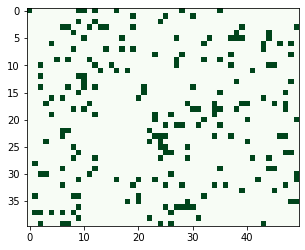

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(A.dense.shape[0])
sampleSDR=np.reshape(A.dense,(40,50))
#print(sampleSDR)

plt.imshow(sampleSDR, cmap = "Greens")
plt.show()

2000


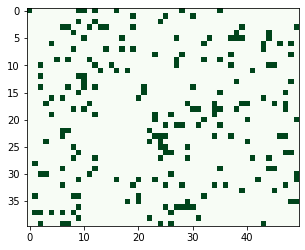

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(A.dense.shape[0])
sampleSDR=A.dense.reshape(40,50)
#print(sampleSDR)

plt.imshow(sampleSDR, cmap = "Greens")
plt.show()

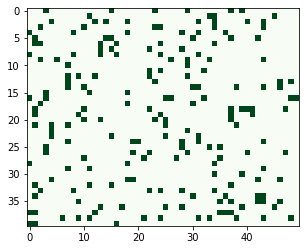

SDR( 2000 )
    Sparsity Min/Mean/Std/Max 0.1 / 0.0999976 / 7.32675e-06 / 0.1
    Activation Frequency Min/Mean/Std/Max 0 / 0.1 / 0.0962812 / 0.5
    Entropy 0.81527
    Overlap Min/Mean/Std/Max 0.08 / 0.103331 / 0.0135398 / 0.13


In [21]:
from htm.bindings.sdr import SDR, Metrics
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
%matplotlib inline

A = SDR( 2000 )
M = Metrics( A, period = 1000 )  #  これは自動的に SDR A を追跡します
for i in range( 10 ):
    A.randomize( sparsity = .10 )
    sampleSDR=np.reshape(A.dense,(40,50))

    clear_output(wait = True)
    plt.cla
    plt.imshow(sampleSDR, cmap = "Greens")
    plt.pause(0.01)

print( M )

In [22]:
A = SDR( dimensions = 2000 )
M = Metrics( A, period = 1000 )
A.randomize( 0.10 )
for i in range( 20 ):
    A.addNoise( 0.55 )
print( M )

SDR( 2000 )
    Sparsity Min/Mean/Std/Max 0.1 / 0.0999989 / 5.20038e-06 / 0.1
    Activation Frequency Min/Mean/Std/Max 0 / 0.100001 / 0.0959263 / 0.619048
    Entropy 0.832841
    Overlap Min/Mean/Std/Max 0.45 / 0.449998 / 1.06406e-05 / 0.45


## SDRのメトリクス

### ドキュメント

In [2]:
!python3 -m pydoc htm.bindings.sdr.Sparsity

Help on class Sparsity in htm.bindings.sdr:

hhttmm..bbiinnddiinnggss..ssddrr..SSppaarrssiittyy = class Sparsity(MetricsHelper_)
 |  Measures the sparsity of an SDR.  This accumulates measurements using an
 |  exponential moving average, and outputs a summary of results.
 |  
 |  Example Usage:
 |      A = SDR( dimensions )
 |      B = Sparsity( A, period = 1000 )
 |      A.randomize( 0.01 )
 |      A.randomize( 0.15 )
 |      A.randomize( 0.05 )
 |      B.sparsity ->  0.05
 |      B.min()    ->  0.01
 |      B.max()    ->  0.15
 |      B.mean()   -> ~0.07
 |      B.std()    -> ~0.06
 |      str(B)     -> Sparsity Min/Mean/Std/Max 0.01 / 0.0700033 / 0.0588751 / 0.15
 |  
 |  Method resolution order:
 |      Sparsity
 |      MetricsHelper_
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  ____iinniitt____(...)
 |      __init__(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. __init_

In [3]:
!python3 -m pydoc htm.bindings.sdr.ActivationFrequency

Help on class ActivationFrequency in htm.bindings.sdr:

htm.bindings.sdr.ActivationFrequency = class ActivationFrequency(MetricsHelper_)
 |  Measures the activation frequency of each value in an SDR.  This accumulates
 |  measurements using an exponential moving average, and outputs a summary of
 |  results.
 |  
 |  Activation frequencies are Real numbers in the range [0, 1], where zero
 |  indicates never active, and one indicates always active.
 |  Example Usage:
 |      A = SDR( 2 )
 |      B = ActivationFrequency( A, period = 1000 )
 |      A.dense = [0, 0]
 |      A.dense = [0, 1]
 |      A.dense = [1, 1]
 |      B.activationFrequency -> { 0.33, 0.66 }
 |      B.min()     -> 1/3
 |      B.max()     -> 2/3
 |      B.mean()    -> 1/2
 |      B.std()     -> ~0.16
 |      B.entropy() -> ~0.92
 |      str(B)      -> Activation Frequency Min/Mean/Std/Max 0.333333 / 0.5 / 0.166667 / 0.666667
 |                     Entropy 0.918296
 |  
 |  Method resolution order:
 |      ActivationFreq

In [4]:
!python3 -m pydoc htm.bindings.sdr.Overlap

Help on class Overlap in htm.bindings.sdr:

hhttmm..bbiinnddiinnggss..ssddrr..OOvveerrllaapp = class Overlap(MetricsHelper_)
 |  Measures the overlap between successive assignments to an SDR.  This class
 |  accumulates measurements using an exponential moving average, and outputs a
 |  summary of results.
 |  
 |  This class normalizes the overlap into the range [0, 1] by dividing by the
 |  number of active values.
 |  
 |  Example Usage:
 |      A = SDR( dimensions = 1000 )
 |      B = Overlap( A, period = 1000 )
 |      A.randomize( 0.20 )
 |      A.addNoise( 0.95 )  ->  5% overlap
 |      A.addNoise( 0.55 )  -> 45% overlap
 |      A.addNoise( 0.72 )  -> 28% overlap
 |      B.overlap   ->  0.28
 |      B.min()     ->  0.05
 |      B.max()     ->  0.45
 |      B.mean()    ->  0.26
 |      B.std()     -> ~0.16
 |      str(B)      -> Overlap Min/Mean/Std/Max 0.05 / 0.260016 / 0.16389 / 0.45
 |  
 |  Method resolution order:
 |      Overlap
 |      MetricsHelper